In [1]:
import csv

import numpy as np
import tensorflow as tf
from sklearn.model_selection import train_test_split

RANDOM_SEED = 42

# 各パス指定

In [2]:
dataset = 'model/keypoint_classifier/keypoint.csv'
model_save_path = 'model/keypoint_classifier/keypoint_classifier.hdf5'

# 分類数設定

In [3]:
NUM_CLASSES = 26

# 学習データ読み込み

In [4]:
X_dataset = np.loadtxt(dataset, delimiter=',', dtype='float32', usecols=list(range(1, (21 * 2) + 1)))

In [5]:
y_dataset = np.loadtxt(dataset, delimiter=',', dtype='int32', usecols=(0))

In [6]:
X_train, X_test, y_train, y_test = train_test_split(X_dataset, y_dataset, train_size=0.75, random_state=RANDOM_SEED)

# モデル構築

In [7]:
model = tf.keras.models.Sequential([
    tf.keras.layers.Input((21 * 2, )),
    tf.keras.layers.Dropout(0.2),
    tf.keras.layers.Dense(20, activation='relu'),
    tf.keras.layers.Dropout(0.4),
    tf.keras.layers.Dense(10, activation='relu'),
    tf.keras.layers.Dense(NUM_CLASSES, activation='softmax')
])

In [8]:
model.summary()  # tf.keras.utils.plot_model(model, show_shapes=True)

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dropout (Dropout)           (None, 42)                0         
                                                                 
 dense (Dense)               (None, 20)                860       
                                                                 
 dropout_1 (Dropout)         (None, 20)                0         
                                                                 
 dense_1 (Dense)             (None, 10)                210       
                                                                 
 dense_2 (Dense)             (None, 24)                264       
                                                                 
Total params: 1,334
Trainable params: 1,334
Non-trainable params: 0
_________________________________________________________________


In [9]:
# モデルチェックポイントのコールバック
cp_callback = tf.keras.callbacks.ModelCheckpoint(
    model_save_path, verbose=1, save_weights_only=False)
# 早期打ち切り用コールバック
es_callback = tf.keras.callbacks.EarlyStopping(patience=20, verbose=1)

In [10]:
# モデルコンパイル
model.compile(
    optimizer='adam',
    loss='sparse_categorical_crossentropy',
    metrics=['accuracy']
)

# モデル訓練

In [11]:
model.fit(
    X_train,
    y_train,
    epochs=1000,
    batch_size=128,
    validation_data=(X_test, y_test),
    callbacks=[cp_callback, es_callback]
)

Epoch 1/1000
 1/23 [>.............................] - ETA: 3s - loss: 3.2564 - accuracy: 0.0547

2024-04-23 19:23:10.342034: W tensorflow/tsl/platform/profile_utils/cpu_utils.cc:128] Failed to get CPU frequency: 0 Hz



Epoch 1: saving model to model/keypoint_classifier/keypoint_classifier.hdf5
23/23 [==============================] - 0s 5ms/step - loss: 3.2119 - accuracy: 0.0606 - val_loss: 3.1699 - val_accuracy: 0.0421
Epoch 2/1000
 1/23 [>.............................] - ETA: 0s - loss: 3.1696 - accuracy: 0.1016
Epoch 2: saving model to model/keypoint_classifier/keypoint_classifier.hdf5
23/23 [==============================] - 0s 1ms/step - loss: 3.1511 - accuracy: 0.0777 - val_loss: 3.1236 - val_accuracy: 0.0708
Epoch 3/1000
 1/23 [>.............................] - ETA: 0s - loss: 3.1529 - accuracy: 0.0547
Epoch 3: saving model to model/keypoint_classifier/keypoint_classifier.hdf5
23/23 [==============================] - 0s 1ms/step - loss: 3.1009 - accuracy: 0.0839 - val_loss: 3.0616 - val_accuracy: 0.0842
Epoch 4/1000
 1/23 [>.............................] - ETA: 0s - loss: 3.0557 - accuracy: 0.0938
Epoch 4: saving model to model/keypoint_classifier/keypoint_classifier.hdf5
23/23 [=============

In [12]:
# モデル評価
val_loss, val_acc = model.evaluate(X_test, y_test, batch_size=128)

8/8 [==============================] - 0s 550us/step - loss: 0.6752 - accuracy: 0.8265


In [13]:
# 保存したモデルのロード
model = tf.keras.models.load_model(model_save_path)

In [14]:
# 推論テスト
predict_result = model.predict(np.array([X_test[0]]))
print(np.squeeze(predict_result))
print(np.argmax(np.squeeze(predict_result)))

1/1 [==============================] - 0s 31ms/step
[2.78992985e-07 5.24357413e-13 5.90630636e-23 8.25036477e-05
 3.96676683e-08 1.70392205e-16 5.61666835e-24 2.97988573e-16
 2.62212410e-07 9.05998956e-11 2.07636494e-05 3.55985662e-07
 2.00312787e-24 9.94848055e-18 2.53625609e-09 9.02891064e-17
 9.42790902e-26 4.62630969e-20 1.90644044e-30 1.19416525e-11
 2.63789028e-22 8.90125521e-04 9.99005735e-01 1.75815292e-14]
22


# 混同行列

31/31 [==============================] - 0s 435us/step


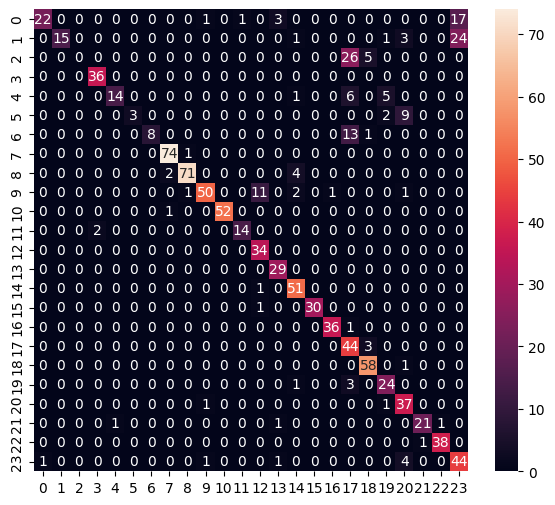

Classification Report
              precision    recall  f1-score   support

           0       0.96      0.50      0.66        44
           1       1.00      0.34      0.51        44
           2       0.00      0.00      0.00        31
           3       0.95      1.00      0.97        36
           4       0.93      0.54      0.68        26
           5       1.00      0.21      0.35        14
           6       1.00      0.36      0.53        22
           7       0.96      0.99      0.97        75
           8       0.97      0.92      0.95        77
           9       0.94      0.76      0.84        66
          10       1.00      0.98      0.99        53
          11       0.93      0.88      0.90        16
          12       0.72      1.00      0.84        34
          13       0.85      1.00      0.92        29
          14       0.85      0.98      0.91        52
          15       1.00      0.97      0.98        31
          16       0.97      0.97      0.97        37
     

/Users/dhanuka/miniconda3/lib/python3.11/site-packages/sklearn/metrics/_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/Users/dhanuka/miniconda3/lib/python3.11/site-packages/sklearn/metrics/_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/Users/dhanuka/miniconda3/lib/python3.11/site-packages/sklearn/metrics/_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


In [15]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix, classification_report

def print_confusion_matrix(y_true, y_pred, report=True):
    labels = sorted(list(set(y_true)))
    cmx_data = confusion_matrix(y_true, y_pred, labels=labels)
    
    df_cmx = pd.DataFrame(cmx_data, index=labels, columns=labels)
 
    fig, ax = plt.subplots(figsize=(7, 6))
    sns.heatmap(df_cmx, annot=True, fmt='g' ,square=False)
    ax.set_ylim(len(set(y_true)), 0)
    plt.show()
    
    if report:
        print('Classification Report')
        print(classification_report(y_test, y_pred))

Y_pred = model.predict(X_test)
y_pred = np.argmax(Y_pred, axis=1)

print_confusion_matrix(y_test, y_pred)

# Tensorflow-Lite用のモデルへ変換

In [16]:
# 推論専用のモデルとして保存
model.save(model_save_path, include_optimizer=False)

In [17]:
# モデルを変換(量子化)
tflite_save_path = 'model/keypoint_classifier/keypoint_classifier.tflite'

converter = tf.lite.TFLiteConverter.from_keras_model(model)
converter.optimizations = [tf.lite.Optimize.DEFAULT]
tflite_quantized_model = converter.convert()

open(tflite_save_path, 'wb').write(tflite_quantized_model)

INFO:tensorflow:Assets written to: /var/folders/tw/m5jjpxsn1013b05mh1nh3m100000gn/T/tmpwy8p09fi/assets


2024-04-23 19:23:25.842231: W tensorflow/compiler/mlir/lite/python/tf_tfl_flatbuffer_helpers.cc:364] Ignored output_format.
2024-04-23 19:23:25.842253: W tensorflow/compiler/mlir/lite/python/tf_tfl_flatbuffer_helpers.cc:367] Ignored drop_control_dependency.


7424

# 推論テスト

In [18]:
interpreter = tf.lite.Interpreter(model_path=tflite_save_path)
interpreter.allocate_tensors()

INFO: Initialized TensorFlow Lite runtime.
INFO: Applying 1 TensorFlow Lite delegate(s) lazily.
INFO: Created TensorFlow Lite XNNPACK delegate for CPU.
VERBOSE: Replacing 4 node(s) with delegate (TfLiteXNNPackDelegate) node, yielding 1 partitions for the whole graph.
INFO: Successfully applied the default TensorFlow Lite delegate indexed at 0.
 *NOTE*: because a delegate has been applied, the precision of computations should be unchanged, but the exact output tensor values may have changed. If such output values are checked in your code, like in your tests etc., please consider increasing error tolerance for the check.


In [19]:
# 入出力テンソルを取得
input_details = interpreter.get_input_details()
output_details = interpreter.get_output_details()

In [20]:
interpreter.set_tensor(input_details[0]['index'], np.array([X_test[0]]))

In [21]:
%%time
# 推論実施
interpreter.invoke()
tflite_results = interpreter.get_tensor(output_details[0]['index'])

CPU times: user 196 µs, sys: 211 µs, total: 407 µs
Wall time: 309 µs


In [22]:
print(np.squeeze(tflite_results))
print(np.argmax(np.squeeze(tflite_results)))

[2.7899270e-07 5.2435747e-13 5.9063070e-23 8.2503575e-05 3.9667594e-08
 1.7039222e-16 5.6166691e-24 2.9798749e-16 2.6221164e-07 9.0599556e-11
 2.0763611e-05 3.5598532e-07 2.0031206e-24 9.9484814e-18 2.5362514e-09
 9.0289113e-17 9.4279109e-26 4.6263100e-20 1.9064408e-30 1.1941653e-11
 2.6378905e-22 8.9012383e-04 9.9900573e-01 1.7581531e-14]
22
